In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from IPython.display import Image

import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection  import RFE
from sklearn.decomposition import PCA

### Область работы 2 (поиск  модели .... )

In [6]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [9]:
df = pd.read_csv(path_train)
df

,wage,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
0,8.50,12,16,34,cauc,other,female,technical,other,no,no
1,10.00,14,22,42,cauc,other,male,technical,other,no,yes
2,24.98,16,18,40,cauc,other,male,management,other,no,yes
3,4.50,12,3,21,cauc,other,female,management,other,no,yes
4,8.00,12,8,26,cauc,other,female,office,other,no,no
...,...,...,...,...,...,...,...,...,...,...,...
395,10.00,16,7,29,hispanic,other,male,management,other,yes,yes
396,6.75,10,13,29,cauc,other,male,worker,manufacturing,no,yes
397,9.00,16,7,29,other,other,male,management,other,no,yes
398,9.57,12,5,23,cauc,other,female,services,other,yes,yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wage        400 non-null    float64
 1   education   400 non-null    int64  
 2   experience  400 non-null    int64  
 3   age         400 non-null    int64  
 4   ethnicity   400 non-null    object 
 5   region      400 non-null    object 
 6   gender      400 non-null    object 
 7   occupation  400 non-null    object 
 8   sector      400 non-null    object 
 9   union       400 non-null    object 
 10  married     400 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 34.5+ KB


In [15]:
df.describe()

,wage,education,experience,age
count,400.000000,400.000000,400.000000,400.000000
mean,9.078150,12.960000,17.860000,36.810000
std,5.274194,2.694727,12.474953,11.840159
min,1.000000,2.000000,0.000000,18.000000
25%,5.240000,12.000000,8.000000,28.000000
50%,7.670000,12.000000,15.000000,35.000000
75%,11.327500,14.250000,26.000000,44.000000
max,44.500000,18.000000,55.000000,64.000000


In [18]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Уникальные элементы колонки {col}: {unique_vals}")

Уникальные элементы колонки wage: [ 8.5  10.   24.98  4.5   8.    5.5   5.   14.21 11.25  3.5   3.95  8.89
 11.11  9.25  6.5   7.78  3.    3.8   1.    9.33 16.65 16.   12.    6.
  5.75  8.8   3.35  8.2   4.17 20.    8.63  4.75  3.56  8.56  9.6   6.75
  9.    5.71  9.37 25.    3.4  15.    5.56  5.21  5.3  10.43 22.83  4.8
  4.35  8.99  5.26  5.4  12.5   5.25  6.67  6.73 13.95  9.75  7.5  12.16
 13.12  9.63 10.67  6.58  6.25 19.    7.   12.22 12.05 13.71  8.93  6.85
  6.1  13.26  8.4   4.   10.58  7.3  12.67  9.1  20.4   8.49  4.85  5.2
  8.43  6.88  6.4  10.78  6.28  3.84 11.79 18.16  3.64  3.51 13.2  16.42
  9.5  13.45 16.26  4.84  4.25  3.75  9.42 12.65 10.2   3.6   8.75  5.85
 13.98  7.45 10.62  5.35  9.83 19.98 22.2   5.95 10.25  2.01 11.5   9.56
  2.85  9.22  5.62  5.65 13.   14.67  7.14 21.25 11.36 11.71 10.5   7.65
 18.5   4.55 12.57  9.17 11.32  4.45 19.38 11.84  5.87  4.59  3.65  5.8
 13.89 16.14 10.28 18.   11.   22.   14.    6.94  9.86 12.2  11.43  7.7
  8.9   5.13 26.29  4.2

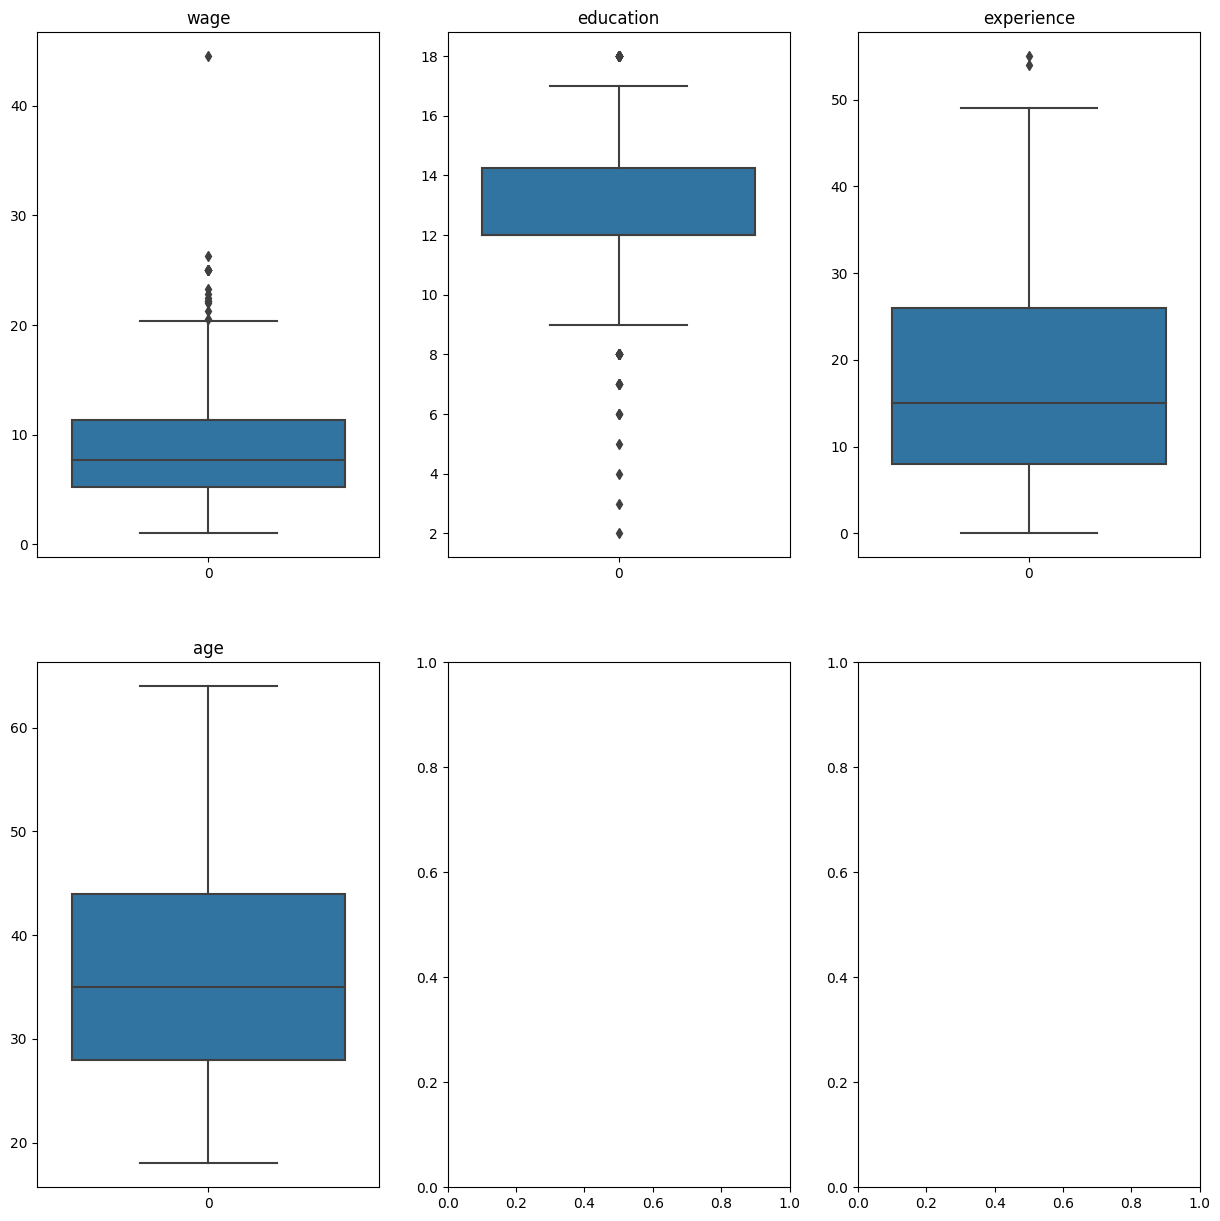

In [21]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,15))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

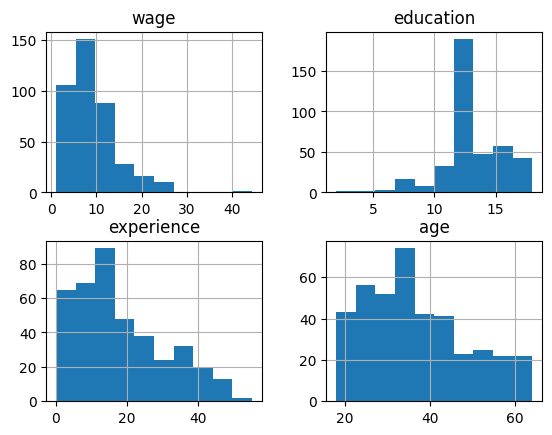

In [25]:
df.hist();

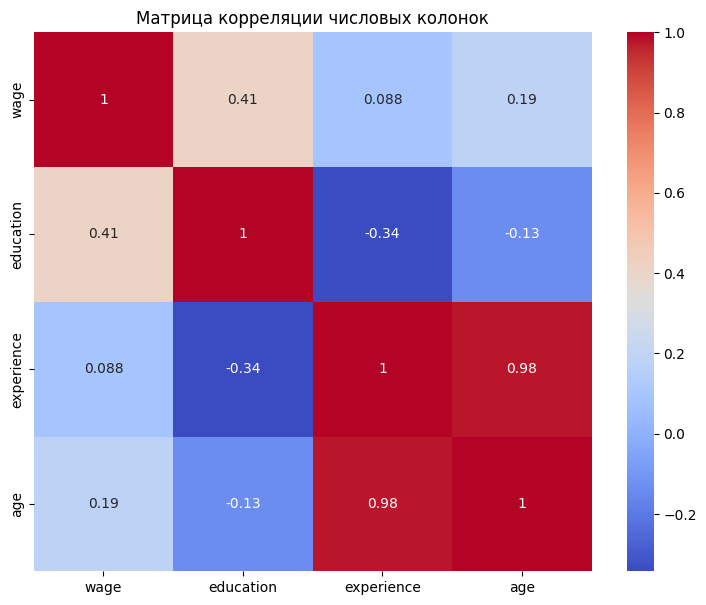

In [28]:
# Фильтруем только числовые колонки
numerical_df = df.select_dtypes(include=['number'])

# Вычисляем матрицу корреляции
corr_matrix = numerical_df.corr()

# Создаем тепловую карту
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Добавляем заголовок
plt.title('Матрица корреляции числовых колонок')

# Отображаем график
plt.show()

In [31]:
X = df.drop(['wage'],axis=1)
y = df['wage']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,  test_size = 0.2)

In [37]:
X_test

,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
151,16,6,28,cauc,other,female,technical,other,yes,no
272,15,10,31,cauc,south,female,technical,other,no,yes
161,12,39,57,cauc,south,female,office,other,no,yes
287,14,15,35,cauc,south,male,technical,other,no,yes
111,12,16,34,cauc,other,male,worker,other,yes,yes
...,...,...,...,...,...,...,...,...,...,...
162,16,8,30,other,other,male,management,other,no,no
43,9,33,48,cauc,other,male,office,other,yes,no
156,16,10,32,cauc,other,male,management,other,no,no
336,11,18,35,cauc,other,male,worker,other,yes,yes


In [184]:
axis_features = ['education','experience','age'] # сюда вписываются числовые колонки
categorical_features = ['ethnicity','occupation', 'sector'] # сюда вписываются категориальные колонки для OneHotEncoder
categorical_ordinal = ['region', 'gender', 'union', 'married'] # сюда вписываются категориальные в перевод в числа без приориотизации (например, бинарные 0 1)
# categorical_with_order = [] # сюда вписываются категориальные для перевода в числа с приоритизацией порядка (от 0 до N)

# здесь идет преобразование числовых
imputer_for_nums = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 5, missing_values=np.nan)),
    ('scaler', MinMaxScaler())
])

imputer_for_categorical_OHE = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('scaler', OneHotEncoder())
    
])

imputer_for_categorical_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder())
    
])

order_for_cat = [{
    'col':'Age',
    'mapping':{'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
    }]

imputer_for_categorical_with_order = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=order_for_cat)),
    ('scaler', MinMaxScaler())
    ])



CT = ColumnTransformer([
    
        ("imputer_for_nums", imputer_for_nums, axis_features), # здесь идет преобразование числовых
        ("imputer_for_categorical_OHE", imputer_for_categorical_OHE, categorical_features), ## здесь onehotencoder (страны, города и тд)
        ("imputer_for_categorical_ordinal", imputer_for_categorical_ordinal, categorical_ordinal), # преобразование категорий в бинарные 0 1
#         ("imputer_for_categorical_with_order", imputer_for_categorical_with_order, categorical_with_order) # преобразование категорий в приоритизированный массив от 0 до N

             ], 
    
    
        remainder = 'passthrough')

display(CT)

res_ct = CT.fit_transform(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_for_nums',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['education', 'experience', 'age']),
                                ('imputer_for_categorical_OHE',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', OneHotEncoder())]),
                                 ['ethnicity', 'occupation', 'sector']),
                                ('imputer_for_categorical_ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', OrdinalEncoder())]),
                                 ['region', 'gender', 'union', 'married'])])

In [44]:
X_train_new = pd.DataFrame(res_ct, columns=CT.get_feature_names_out())


X_train_new

X_test_new = pd.DataFrame(CT.transform(X_test), columns=CT.get_feature_names_out())


X_test_new

,imputer_for_nums__education,imputer_for_nums__experience,imputer_for_nums__age,imputer_for_categorical_OHE__ethnicity_cauc,imputer_for_categorical_OHE__ethnicity_hispanic,imputer_for_categorical_OHE__ethnicity_other,imputer_for_categorical_OHE__occupation_management,imputer_for_categorical_OHE__occupation_office,imputer_for_categorical_OHE__occupation_sales,imputer_for_categorical_OHE__occupation_services,imputer_for_categorical_OHE__occupation_technical,imputer_for_categorical_OHE__occupation_worker,imputer_for_categorical_OHE__sector_construction,imputer_for_categorical_OHE__sector_manufacturing,imputer_for_categorical_OHE__sector_other,imputer_for_categorical_ordinal__region,imputer_for_categorical_ordinal__gender,imputer_for_categorical_ordinal__union,imputer_for_categorical_ordinal__married
0,0.8750,0.111111,0.217391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.8125,0.185185,0.282609,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.6250,0.722222,0.847826,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.7500,0.277778,0.369565,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0.6250,0.296296,0.347826,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.8750,0.148148,0.260870,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
76,0.4375,0.611111,0.652174,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
77,0.8750,0.185185,0.304348,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
78,0.5625,0.333333,0.369565,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [47]:
y_train_new = y_train.values

In [50]:
from pycaret.regression import *
setup(X_train_new,target=y_train_new,session_id=42,train_size= 0.8)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Regression
3,Original data shape,"(320, 20)"
4,Transformed data shape,"(320, 20)"
5,Transformed train set shape,"(256, 20)"
6,Transformed test set shape,"(64, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [53]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,3.2558,19.0733,4.2907,0.2629,0.4051,0.4346,0.0060
ridge,Ridge Regression,3.2892,19.1881,4.3141,0.2424,0.4100,0.4574,0.0080
lr,Linear Regression,3.2877,19.1651,4.3077,0.2399,0.4121,0.4575,0.6590
br,Bayesian Ridge,3.3128,19.4655,4.3491,0.2346,0.4144,0.4606,0.0040
lightgbm,Light Gradient Boosting Machine,3.4055,20.3821,4.4684,0.1243,0.4234,0.4611,0.0280
catboost,CatBoost Regressor,3.4228,20.9870,4.5242,0.1233,0.4257,0.4648,0.3250
rf,Random Forest Regressor,3.4385,21.1048,4.5158,0.1115,0.4205,0.4702,0.0330
gbr,Gradient Boosting Regressor,3.4048,21.9927,4.6112,0.1097,0.4232,0.4560,0.0150
ada,AdaBoost Regressor,3.6113,22.0910,4.6647,0.0636,0.4447,0.5361,0.0130
omp,Orthogonal Matching Pursuit,4.0240,26.8209,5.0977,-0.0265,0.4748,0.5499,0.0060


HuberRegressor()

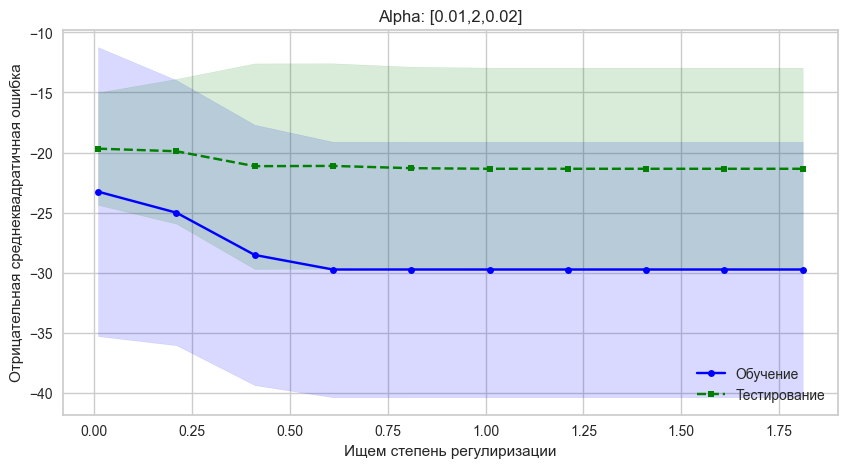

In [60]:
# Подбираем степень регулиризации alpha
alpha = np.arange(0.01,2,0.2)
scores_train = []
scores_test = []
for i in alpha:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', Lasso(alpha = i))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Alpha: [0.01,2,0.02]')
plt.plot(alpha, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(alpha, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(alpha, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(alpha, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем степень регулиризации')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

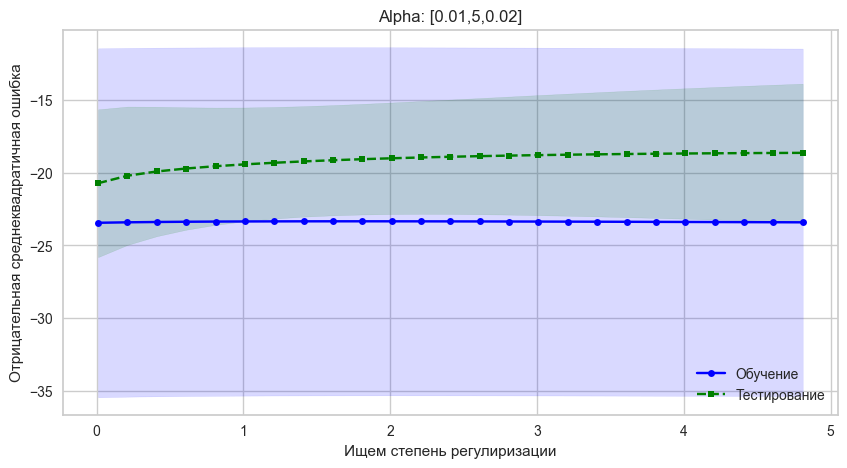

In [63]:
# Подбираем кол-во максимальной выборки max_samples
alpha = np.arange(0.01,5,0.2)
scores_train = []
scores_test = []
for i in alpha:
    ridge = Pipeline([ ('preprocessing', CT) , ('regression', Ridge(alpha = i))])
    scores_train.append(cross_val_score(ridge, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(ridge, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Alpha: [0.01,5,0.02]')
plt.plot(alpha, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(alpha, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(alpha, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(alpha, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем степень регулиризации')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

In [66]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', Lasso())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 29.487079000000005
Test: 20.853259999999995
Train: 0.5721288289709884
Test: 0.5514953314276066


In [142]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', Lars())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

# Добавляем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse = cross_val_score(pipe_1, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_mape = cross_val_score(pipe_1, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Результаты кросс-валидации
print("\nCross-Validation Results:")
print("MSE (Mean ± Std):", -cv_mse.mean(), "±", cv_mse.std())
print("MAPE (Mean ± Std):", -cv_mape.mean(), "±", cv_mape.std())

Train: 20.299748415935994
Test: 14.019453491683967
Train: 0.43826777979517983
Test: 0.39153409236675885

Cross-Validation Results:
MSE (Mean ± Std): 24.434280812101065 ± 8.579195267928204
MAPE (Mean ± Std): 0.4720134561505489 ± 0.1082026393612847


In [144]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', ElasticNet())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

# Добавляем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse = cross_val_score(pipe_1, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_mape = cross_val_score(pipe_1, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Результаты кросс-валидации
print("\nCross-Validation Results:")
print("MSE (Mean ± Std):", -cv_mse.mean(), "±", cv_mse.std())
print("MAPE (Mean ± Std):", -cv_mape.mean(), "±", cv_mape.std())

Train: 29.453010285147236
Test: 20.806743892756025
Train: 0.5717205626498811
Test: 0.5509699077773706

Cross-Validation Results:
MSE (Mean ± Std): 29.643754432826256 ± 8.202291747302905
MAPE (Mean ± Std): 0.5715422371082411 ± 0.06575269052640025


In [146]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', LinearRegression())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

# Добавляем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse = cross_val_score(pipe_1, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_mape = cross_val_score(pipe_1, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Результаты кросс-валидации
print("\nCross-Validation Results:")
print("MSE (Mean ± Std):", -cv_mse.mean(), "±", cv_mse.std())
print("MAPE (Mean ± Std):", -cv_mape.mean(), "±", cv_mape.std())

Train: 20.299748415935994
Test: 14.019453491683937
Train: 0.4382677797951775
Test: 0.39153409236675707

Cross-Validation Results:
MSE (Mean ± Std): 24.43423704692267 ± 8.579119383095987
MAPE (Mean ± Std): 0.47200828599924166 ± 0.10820007786826395


In [148]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', Ridge())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

# Добавляем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse = cross_val_score(pipe_1, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_mape = cross_val_score(pipe_1, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Результаты кросс-валидации
print("\nCross-Validation Results:")
print("MSE (Mean ± Std):", -cv_mse.mean(), "±", cv_mse.std())
print("MAPE (Mean ± Std):", -cv_mape.mean(), "±", cv_mape.std())

Train: 20.342541741345094
Test: 14.150011160369019
Train: 0.439198542213412
Test: 0.3948169017296782

Cross-Validation Results:
MSE (Mean ± Std): 24.0760245796691 ± 7.997016713184031
MAPE (Mean ± Std): 0.46950275376600736 ± 0.10485211320185304


In [195]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVR
import numpy as np

# Параметры для поиска
C = np.array([0.5, 1, 2, 3, 5, 10])
gamma = [0.01, 0.05, 0.1]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']  # Добавлены ядра

# Определение пайплайна
pipe = Pipeline([
    ('preprocessing', CT), 
    ('classifier', SVR())
])

# Расширенный параметр grid
param_grid = [
    {
        'preprocessing': [CT],
        'classifier': [SVR()],
        'classifier__kernel': kernels,  # Добавлены ядра
        'classifier__C': C,
        'classifier__gamma': gamma
    }
]

# GridSearchCV с несколькими ядрами
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=KFold(5),
    return_train_score=True,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1
)

# Обучение модели
grid.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid.best_params_)
print("Лучший результат:", -grid.best_score_)



Лучшие параметры: {'classifier': SVR(), 'classifier__C': 1.0, 'classifier__gamma': 0.01, 'classifier__kernel': 'linear', 'preprocessing': ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_for_nums',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['education', 'experience', 'age']),
                                ('imputer_for_categorical_OHE',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', OneHotEncoder())]),
                                 ['ethnicity', 'occupation', 'sector']),
                                ('imputer_for_categorical_ordinal',
                                 Pipeline(steps=[('imputer',
                                          

In [199]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,20,16,12,58,0,4,8,46,54,66,...,2,17,3,5,61,49,37,25,13,1
mean_fit_time,0.019138,0.027699,0.018901,0.026626,0.031885,0.021181,0.024898,0.029344,0.028967,0.031475,...,0.031598,0.021503,0.025916,0.019567,0.023568,0.020701,0.031329,0.02265,0.019315,0.0312
std_fit_time,0.006828,0.006095,0.006527,0.006237,0.001906,0.003938,0.009355,0.006764,0.007961,0.000825,...,0.006067,0.00724,0.002841,0.006661,0.00577,0.007097,0.008134,0.00712,0.006329,0.000976
mean_score_time,0.009981,0.006541,0.009533,0.012003,0.012775,0.008107,0.011555,0.014843,0.013803,0.009798,...,0.015049,0.01312,0.011134,0.013101,0.010173,0.013867,0.010606,0.003051,0.012272,0.014269
std_score_time,0.008168,0.007464,0.007798,0.006311,0.000672,0.007124,0.009178,0.003748,0.002834,0.008042,...,0.001318,0.006633,0.000698,0.006676,0.00588,0.008086,0.002872,0.006103,0.006157,0.001489
param_classifier,SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),...,SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR()
param_classifier__C,1.0,1.0,1.0,5.0,0.5,0.5,0.5,3.0,5.0,10.0,...,0.5,1.0,0.5,0.5,10.0,5.0,3.0,2.0,1.0,0.5
param_classifier__gamma,0.1,0.05,0.01,0.1,0.01,0.05,0.1,0.1,0.05,0.05,...,0.01,0.05,0.01,0.05,0.01,0.01,0.01,0.01,0.01,0.01
param_classifier__kernel,linear,linear,linear,rbf,linear,linear,linear,rbf,rbf,rbf,...,rbf,poly,sigmoid,poly,poly,poly,poly,poly,poly,poly
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...",...,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,"{'classifier': SVR(), 'classifier__C': 1.0, 'c...","{'classifier': SVR(), 'classifier__C': 1.0, 'c...","{'classifier': SVR(), 'classifier__C': 1.0, 'c...","{'classifier': SVR(), 'classifier__C': 5.0, 'c...","{'classifier': SVR(), 'classifier__C': 0.5, 'c...","{'classifier': SVR(), 'classifier__C': 0.5, 'c...","{'classifier': SVR(), 'classifier__C': 0.5, 'c...","{'classifier': SVR(), 'classifier__C': 3.0, 'c...","{'classifier': SVR(), 'classifier__C': 5.0, 'c...","{'classifier': SVR(), 'classifier__C': 10.0, '...",...,"{'classifier': SVR(), 'classifier__C': 0.5, 'c...","{'classifier': SVR(), 'classifier__C': 1.0, 'c...","{'classifier': SVR(), 'classifier__C': 0.5, 'c...","{'classifier': SVR(), 'classifier__C': 0.5, 'c...","{'classifier': SVR(), 'classifier__C': 10.0, '...","{'classifier': SVR(), 'classifier__C': 5.0, 'c...","{'classifier': SVR(), 'classifier__C': 3.0, 'c...","{'classifier': SVR(), 'classifier__C': 2.0, 'c...","{'classifier': SVR(), 'classifier__C': 1.0, 'c...","{'classifier': SVR(), 'classifier__C': 0.5, 'c..."


In [203]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', SVR(C = 5, gamma = 0.01))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 25.376260290144373
Test: 16.426406676777354
Train: 0.3943229609839835
Test: 0.3644701307385612


In [102]:
# from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', KNeighborsRegressor())])

n_neighbors  = np.arange(1,200,10)
p= [1,2,3]
weights = ['uniform']

param_grid = [
    {'preprocessing': [CT],
    'classifier': [KNeighborsRegressor()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка


# cross_val = StratifiedShuffleSplit(n_splits=3)
# cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=KFold(5),
                    return_train_score = True,
                   n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error') # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['education',
                                                                          'experience',
                                                                          'age']),
                                                                        ('imputer_for_categorical_OHE',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Simp...
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OneHotEncoder())]),
                                                                             ['ethnicity',
                                                                              'occupation',
                                                                              'sector']),
                                                                            ('imputer_for_categorical_ordinal',
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OrdinalEncoder())]),
                                                                             ['region',
                                                                              'gender',
                                                                              'union',
                                                                              'married'])])]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [104]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,8,7,6,3,9,10,11,5,4,12,...,50,49,54,53,52,55,56,57,59,58
mean_fit_time,0.022105,0.026555,0.024148,0.01947,0.021314,0.020501,0.020698,0.019453,0.024866,0.019537,...,0.021727,0.021451,0.022297,0.023475,0.023214,0.025723,0.019394,0.022792,0.020533,0.017909
std_fit_time,0.002236,0.007445,0.007646,0.002643,0.002431,0.002552,0.003413,0.001956,0.009475,0.002393,...,0.011082,0.008269,0.008171,0.009898,0.013625,0.007766,0.002114,0.006957,0.007257,0.006743
mean_score_time,0.014906,0.013097,0.015472,0.012076,0.012175,0.011985,0.01571,0.017229,0.012619,0.010564,...,0.013565,0.017012,0.013591,0.020577,0.010991,0.023895,0.020229,0.009446,0.024505,0.020113
std_score_time,0.001031,0.000971,0.00262,0.002058,0.002518,0.001562,0.003852,0.005849,0.002555,0.001059,...,0.002555,0.009963,0.006449,0.009028,0.012714,0.019268,0.015031,0.007003,0.007203,0.00578
param_classifier,KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),...,KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor()
param_classifier__n_neighbors,21,21,21,11,31,31,31,11,11,41,...,161,161,181,171,171,181,181,191,191,191
param_classifier__p,3,2,1,1,1,2,3,3,2,1,...,3,2,1,3,2,2,3,1,3,2
param_classifier__weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...",...,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,"{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...",...,"{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif...","{'classifier': KNeighborsRegressor(), 'classif..."


In [190]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', KNeighborsRegressor(n_neighbors=21, p = 3))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

# Добавляем кросс-валидацию
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_mse = cross_val_score(pipe_1, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_mape = cross_val_score(pipe_1, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Результаты кросс-валидации
print("\nCross-Validation Results:")
print("MSE (Mean ± Std):", -cv_mse.mean(), "±", cv_mse.std())
print("MAPE (Mean ± Std):", -cv_mape.mean(), "±", cv_mape.std())

Train: 22.307235817743763
Test: 16.413965274943312
Train: 0.4749457872129545
Test: 0.47256598432356506

Cross-Validation Results:
MSE (Mean ± Std): 24.637273111536285 ± 11.464080387645673
MAPE (Mean ± Std): 0.4902702334833468 ± 0.1018957586986418


In [160]:
pipe = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingRegressor())])

n_estimators  = np.arange(10,200,20)
# min_samples_leaf = [1,3,5,7,9,11]
learning_rate = np.arange(0.01,1,0.02)
# subsample= [0.1,0.5,1]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [GradientBoostingRegressor()],
     'classifier__n_estimators': n_estimators,
#      'classifier__min_samples_leaf': min_samples_leaf
     'classifier__learning_rate': learning_rate
    }
] #решетка


grid = GridSearchCV(pipe,param_grid, cv=KFold(5),
                    return_train_score = True,
                   n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error' ) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['education',
                                                                          'experience',
                                                                          'age']),
                                                                        ('imputer_for_categorical_OHE',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Simp...
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OneHotEncoder())]),
                                                                             ['ethnicity',
                                                                              'occupation',
                                                                              'sector']),
                                                                            ('imputer_for_categorical_ordinal',
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OrdinalEncoder())]),
                                                                             ['region',
                                                                              'gender',
                                                                              'union',
                                                                              'married'])])]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [162]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,38,37,35,82,83,36,39,29,63,34,...,479,478,418,469,464,466,463,465,468,467
mean_fit_time,0.219759,0.189155,0.153053,0.089892,0.118107,0.195246,0.247882,0.253903,0.133898,0.119853,...,0.249147,0.217917,0.227535,0.240686,0.125116,0.175912,0.093973,0.146502,0.217822,0.186808
std_fit_time,0.017061,0.014539,0.01181,0.005069,0.01605,0.029999,0.023131,0.023722,0.012108,0.0103,...,0.01795,0.019705,0.023626,0.019073,0.009118,0.012191,0.00264,0.009655,0.010587,0.016666
mean_score_time,0.017955,0.015068,0.01217,0.016825,0.017153,0.00991,0.018431,0.010251,0.014287,0.009903,...,0.013812,0.013085,0.014014,0.01113,0.009769,0.011088,0.009795,0.015847,0.017545,0.018006
std_score_time,0.00974,0.004297,0.003988,0.007618,0.008276,0.000201,0.007495,0.000303,0.008479,0.000196,...,0.00467,0.006053,0.003939,0.005026,0.001911,0.002198,0.001972,0.004968,0.005259,0.007478
param_classifier,GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),...,GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor()
param_classifier__learning_rate,0.07,0.07,0.07,0.17,0.17,0.07,0.07,0.05,0.13,0.07,...,0.95,0.95,0.83,0.93,0.93,0.93,0.93,0.93,0.93,0.93
param_classifier__n_estimators,170,150,110,50,70,130,190,190,70,90,...,190,170,170,190,90,130,70,110,170,150
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...",...,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,"{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...",...,"{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c...","{'classifier': GradientBoostingRegressor(), 'c..."
split0_test_score,-0.395432,-0.393521,-0.40129,-0.397885,-0.392625,-0.391185,-0.394501,-0.397436,-0.41213,-0.403433,...,-0.621661,-0.632063,-0.568698,-0.6252,-0.61085,-0.618108,-0.6197,-0.629676,-0.614368,-0.605801


In [164]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', GradientBoostingRegressor(learning_rate = 0.07, n_estimators = 170))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

# Добавляем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse = cross_val_score(pipe_1, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_mape = cross_val_score(pipe_1, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Результаты кросс-валидации
print("\nCross-Validation Results:")
print("MSE (Mean ± Std):", -cv_mse.mean(), "±", cv_mse.std())
print("MAPE (Mean ± Std):", -cv_mape.mean(), "±", cv_mape.std())

Train: 6.122640857852038
Test: 16.363488809720035
Train: 0.2554919047085741
Test: 0.4266357361088751

Cross-Validation Results:
MSE (Mean ± Std): 32.632639701327534 ± 16.341563915532788
MAPE (Mean ± Std): 0.504219003219599 ± 0.08544828892532012


In [167]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', RandomForestRegressor(max_features=0.8))])

n_estimators  = np.arange(100,300,50)
# min_samples_leaf = [3,5,7]
max_depth = [8,10,12,14]

# subsample= [0.1,0.5,1]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [RandomForestRegressor(max_features=0.7)],
     'classifier__n_estimators': n_estimators,
#      'classifier__min_samples_leaf': min_samples_leaf,
     'classifier__max_depth': max_depth

#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

# cross_val = StratifiedShuffleSplit(n_splits=3)
# cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=5,
                    return_train_score = True,
                   n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error') # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['education',
                                                                          'experience',
                                                                          'age']),
                                                                        ('imputer_for_categorical_OHE',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaler',
                                                                                          O...
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OneHotEncoder())]),
                                                                             ['ethnicity',
                                                                              'occupation',
                                                                              'sector']),
                                                                            ('imputer_for_categorical_ordinal',
                                                                             Pipeline(steps=[('imputer',
                                                                                              SimpleImputer(strategy='most_frequent')),
                                                                                             ('scaler',
                                                                                              OrdinalEncoder())]),
                                                                             ['region',
                                                                              'gender',
                                                                              'union',
                                                                              'married'])])]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [170]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,1,0,12,8,2,6,3,4,10,11,15,7,5,9,13,14
mean_fit_time,0.32102,0.210096,0.275973,0.260425,0.435314,0.477142,0.552693,0.248613,0.502963,0.622584,0.550574,0.599291,0.362089,0.37702,0.396579,0.481536
std_fit_time,0.009774,0.006924,0.018662,0.011029,0.016552,0.005712,0.004535,0.012446,0.010732,0.019629,0.028757,0.019869,0.01997,0.009369,0.013095,0.006381
mean_score_time,0.021581,0.018662,0.024548,0.018506,0.031007,0.031249,0.034374,0.021876,0.038402,0.036802,0.025002,0.039196,0.025166,0.029625,0.025,0.031455
std_score_time,0.007815,0.006242,0.007302,0.006075,0.000297,0.000002,0.006251,0.007654,0.008875,0.005215,0.007648,0.008758,0.00646,0.007364,0.007655,0.008604
param_classifier,RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7),RandomForestRegressor(max_features=0.7)
param_classifier__max_depth,8,8,14,12,8,10,8,10,12,12,14,10,10,12,14,14
param_classifier__n_estimators,150,100,100,100,200,200,250,100,200,250,250,250,150,150,150,200
param_preprocessing,"ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ...","ColumnTransformer(remainder='passthrough',\n ..."
params,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...,{'classifier': RandomForestRegressor(max_featu...
split0_test_score,-0.402348,-0.401571,-0.388842,-0.395474,-0.396367,-0.405275,-0.402105,-0.40346,-0.400212,-0.392962,-0.39478,-0.397337,-0.39602,-0.39985,-0.397878,-0.394938


In [179]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', RandomForestRegressor(n_jobs = -1, n_estimators = 150, max_depth = 8, 
                                                   max_features = 0.8, min_samples_leaf = 1))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)
print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

# Результаты кросс-валидации
print("\nCross-Validation Results:")
print("MSE (Mean ± Std):", -cv_mse.mean(), "±", cv_mse.std())
print("MAPE (Mean ± Std):", -cv_mape.mean(), "±", cv_mape.std())

Train: 6.493946715952619
Test: 16.37493015747908
Train: 0.2530676036160281
Test: 0.4207118974089911

Cross-Validation Results:
MSE (Mean ± Std): 32.632639701327534 ± 16.341563915532788
MAPE (Mean ± Std): 0.504219003219599 ± 0.08544828892532012
